<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Arlington, VA</font></h1>

## Introduction

In this project, we will demonstrate how to convert addresses into their equivalent latitude and longitude values. Also, we will use the Foursquare API to explore neighborhoods in Arlington, VA. We will use the **explore** function in the Foursquar API to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. We will use the "Logistic Regression" algorithm to identify the features that predict whether a neigborhood is a Metro station. 

The expectation is that the algorith will identify false-positives, i.e., neighborhoods that are developed like Metro Stations, but which are not.  These false-postive neighborhoods would be expected to further develop like the Metro Station neighborhoods. 

If you want to follow along, skip over the two lines to install and import folium.  
Then, execute the line that imports numpy and pandas, et al.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Import the required libraries</a>

2. <a href="#item2">Identify Neighborhoods in Arlington, VA</a>

3. <a href="#item3">Use the Foursquare API to Analyze Venues in Each Neighborhood</a>

4. <a href="#item4">Clean the data for use with Logistic Regression</a>

5. <a href="#item5">Perform Logistic Regression</a>

6. <a href="#item6">Evaluate the Logistic Regression Coefficient Matrix</a>    

7. <a href="#item6">Conclusion</a>    
</font>
</div>

We can skip the following installs and imports of folium, since we need not do the mapping. 

## 1. Execute this cell to import the required libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


### Skip all this, all the way to 4),  and pick-up the csv file that contains the categorized venues by neighborhood
You can read-though all the intermediate steps, but if you want to pick-up the data I used, just import it at section 4.

In [ ]:
#!conda install -c conda-forge geopy --yes 

In [ ]:
# On the IBM Cloud Watson, it is necessary to "install" folium once per session
!conda install -c conda-forge folium=0.5.0 --yes 

In [ ]:
# Once installed, if you lose the Kernel you can repeatedly import folium
import folium # map rendering library

In [ ]:
# This path tells me where I must download folium
#import sys
#sys.path

<a id='item1'></a>

## 2. Identify the Neighborhoods in Arlington and Get their Geo-Code

There are 55 neighborhoods in Arlington, VA, listed below.  We will get their geo-coordinates, using geocoder.geocode.  Then, we will use the Foursquare API to identify all the venues within radius = 5 of the neighborhoods' central points.

I've stored the list of neighborhoods, and their geo-coordinates in a file named: ArlingtonNeighborhoods.csv

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

#### Use geopy library to get the latitude and longitude values of each nieghborhood in Arlington, VA.

In [ ]:
neighborhoods = [
    'Alcova Heights','Arlington Forest','Arlington Heights','Arlington View','Aurora Hills','Ballston','Barcroft','Bellevue Forest','Bluemont','Bonair',
    'Brandon Village','Buckingham','Carlin Springs','Cherrydale','Claremont','Clarendon','Columbia Forest','Columbia Heights','Court House','Country Club Hills',
    'Crescent Hills','Crystal City','Dominion Hills','Donaldson Run','Douglas Park','East Falls Church','Fairlington','Forest Hills',
    'Fort Myer Heights','Glencarlyn','Garden City','Greenbrier','High View Park','Halls Hill','Jackson Court','Lee Heights','Lyon Park','Madison Manor',
    'Maywood','Reagan National Airport','New Dover','Nauck','Green Valley','Old Glebe','Lee Knolls','Penrose', 'Pentagon','Pentagon City','Prospect House',
    'Rivercrest', 'Rosslyn','Shirlington','Tara','Virginia Square','Woodlawn','Waverly Hills','Westmont','Westover','Williamsburg Village','Yorktown']

## You can skip this next cell and merely read the file, 
## "ArlingtonNeighborhoods.csv", further down.
Skip this cell and look a few rows down for the "read_csv()" where I read the csv.

In [ ]:
list_neighborhoods_geo = []
counter=0
for address in neighborhoods:
    print(address)
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address + ', Arlington, VA')
    latitude = 0
    longitude = 0
    if location == None:
        location = pd.DataFrame(columns=['Borough','Neighbourhood','Latitude','Longitude'])
#       print('   ','Print: ', address)
    else:
        latitude = location.latitude
        longitude = location.longitude
#       print('   ',location)
    print('Location: ' + address + ' are {}, {}.'.format(latitude, longitude))
    list_neighborhoods_geo.append([ 'Arlington', address ,latitude, longitude])
#End For

In [ ]:
list_neighborhoods_geo
df_neighborhoods_geo = pd.DataFrame(list_neighborhoods_geo, columns= ['Borough','Neighbourhood','Latitude','Longitude'])
df_neighborhoods_geo.shape

In [ ]:
df_neighborhoods_geo.set_index('Neighbourhood',inplace=True)

In [ ]:
# The geocoder gave the same coordinates for "Old Glebe" and "Prospect House" neighborhoods, 
#  but I knew that these neighborhoos are nowhere near each other
#
print('Before: ______________')
print(df_neighborhoods_geo.loc['Old Glebe'])
df_neighborhoods_geo.loc['Old Glebe',['Latitude','Longitude']]=[38.9202797,-77.1381758]
print()
print('After : ______________')
print(df_neighborhoods_geo.loc['Old Glebe'])

In [ ]:
print(df_neighborhoods_geo.head())

In [ ]:
df_neighborhoods_geo.reset_index(inplace=True)
df_neighborhoods_geo.to_csv (r'C:\Users\George\Downloads\ArlingtonNeighborhoods.csv', index = None, header=True)

### We now have Arlington Neighborhood Geo-coded
There is no need to execute above this line again: We can load geo-coded neighborhoods and run from here.

In [ ]:
# Set the dataframe to Nothing, so we know we're getting the neighborhood geo-coordinates from the .csv
df_neighborhoods_geo=[]
print(df_neighborhoods_geo)

In [ ]:
df_neighborhoods_geo = pd.read_csv(r'C:\Users\George\Downloads\ArlingtonNeighborhoods.csv')
#Note that we saved it with an index, but read it without an index.

In [ ]:
df_neighborhoods_geo.head()

### We can skip this mapping task until later, when we are ready to show and see the map(s)

In [ ]:
address = 'Arlington, VA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ' + address +' are {}, {}.'.format(latitude, longitude))

#### Create a map of Arlington with neighborhoods superimposed on top.

In [ ]:
# create map of Arlington using latitude and longitude values
map_spedifiedNeighborhood = folium.Map(location=[latitude, longitude], zoom_start=13)
# add markers to map
for lat, lng, borough, neighbourhood in zip(df_neighborhoods_geo['Latitude'], df_neighborhoods_geo['Longitude'], df_neighborhoods_geo['Borough'], df_neighborhoods_geo['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_spedifiedNeighborhood)  

map_spedifiedNeighborhood

In [ ]:
map_spedifiedNeighborhood.save('greater.html')

## 3. Use the Foursquare API to explore the neighborhoods and segment them.

Define Foursquare Credentials and Version

In [ ]:
CLIENT_ID     = 'Use your Foursquare ID'         # your Foursquare ID
CLIENT_SECRET = 'Use your Foursquare secret key' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

<a id='item2'></a>

### Explore Neighborhoods in the City (and County) of Arlington, Virginia

#### Let's create a function to list all the venues for all the neighborhoods in Arlington

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            print('error: No Groups')
            
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### This code runs the above function on each neighborhood and create a new dataframe called *Arlington_venues*.

In [ ]:
Arlington_venues = getNearbyVenues(names = df_neighborhoods_geo['Neighbourhood'],
                                   latitudes = df_neighborhoods_geo['Latitude'],
                                   longitudes = df_neighborhoods_geo['Longitude']
                                  )

#### Let's check the size of the resulting dataframe

In [ ]:
print(Arlington_venues.shape)
Arlington_venues

#### Again, we're saving to csv so we don't have to run before this line

In [ ]:
Arlington_venues.reset_index(inplace=True)
Arlington_venues.to_csv (r'C:\Users\George\Downloads\ArlingtonVenues.csv', index = None, header=True)

## 4. Clean the data for use with Logistic Regression

## Here, we can read the venue list.  
Note that after I gathered the data using Foursquare.com, I manipulated it in Excel,  
adding a new column, named "Manually Categorized".  
Essentially, I didn't agree with some of the venue categories from Foursquare.com  
I don't think they would agree with my categorizations either.

In [ ]:
Arlington_venues = pd.DataFrame([])
Arlington_venues.shape

In [2]:
Arlington_venues = pd.read_csv(r'C:\Users\George\Downloads\ArlingtonVenuesCategorized.csv')
print(Arlington_venues.shape)
Arlington_venues.head()

(870, 11)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Metro,Cat 2,Cat 3,Manually Categorized
0,Court House,38.891211,-77.085624,Arlington Rooftop Bar & Grill,38.890303,-77.088122,Bar,Metro,On-premise Food/Drink,Bar,Bar
1,Reagan National Airport,38.853416,-77.044042,American airlines,38.850727,-77.048382,Airport,Metro,Transportation,NaN,Transportation
2,Reagan National Airport,38.853416,-77.044042,DCA Passenger Pick-up,38.853190,-77.043727,Airport,Metro,Transportation,NaN,Transportation
3,Reagan National Airport,38.853416,-77.044042,Ronald Reagan Washington National Airport (DCA...,38.853516,-77.042529,Airport,Metro,Transportation,NaN,Transportation
4,Pentagon City,38.861921,-77.059631,Basin Barroom,38.862920,-77.054940,Bar,NaN,On-premise Food/Drink,Bar,Bar


Note that there is a row for each venue

#### Let's find out how many unique categories can be curated from all the returned venues

In [3]:
print('There are {} uniques categories.'.format(len(Arlington_venues['Manually Categorized'].unique())))

There are 27 uniques categories.


#### We're going to encode each category as 0 or 1.

In [4]:
# one hot encoding
Arlington_onehot = pd.get_dummies(Arlington_venues[['Manually Categorized']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Arlington_onehot['Neighborhood'] = Arlington_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Arlington_onehot.columns[-1]] + list(Arlington_onehot.columns[:-1])
Arlington_onehot = Arlington_onehot[fixed_columns]

print(Arlington_onehot.shape)
Arlington_onehot.head()

(870, 28)


,Neighborhood,Art and History,Bank,Bar,Burgers - Quality,Chinese,Coffee/Breakfast,Construction & Landscaping,Fast Food,Fast Fresh,Food Court,Food Truck,Health & Recreation,Hotel,Ice Cream,Market,Pizza,Rental Car Location,Restaurant,Salad,Sandwich,Steakhouse,Store,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Transportation
0,Court House,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Reagan National Airport,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Reagan National Airport,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Reagan National Airport,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Pentagon City,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Note that we still have one row for each venue.  We need to summarize for each neighborhood.

##### We'll sum the rows by neighborhood, and then compute a total for each venue type.  We'll divide by the total for an average.  
This is a different average than using the DataFrame.groupby.mean(), since that uses a different denominator.

In [5]:
Arlington_grouped = Arlington_onehot.groupby('Neighborhood').sum()
Arlington_grouped.to_csv(r'C:\Users\George\Downloads\Arlington_grouped.csv')
#Arlington_grouped.reset_index(inplace=True)
#Arlington_grouped.drop('Neighborhood',axis=1,inplace=True)
Arlington_grouped.head(8)

,Art and History,Bank,Bar,Burgers - Quality,Chinese,Coffee/Breakfast,Construction & Landscaping,Fast Food,Fast Fresh,Food Court,Food Truck,Health & Recreation,Hotel,Ice Cream,Market,Pizza,Rental Car Location,Restaurant,Salad,Sandwich,Steakhouse,Store,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Transportation
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alcova Heights,0,0,0,0,0,0,0,1,0,0,0,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
Arlington Forest,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,1,1,0,0,0,1,0,0
Arlington Heights,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
Arlington View,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Aurora Hills,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
Ballston,0,2,1,1,1,3,0,0,2,0,0,1,1,0,0,0,0,2,0,1,0,3,0,0,0,0,0
Barcroft,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,2,0,2,0,0,1
Bellevue Forest,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Okay, now we have one row for each neighborhood
Divide by the sum of each column to normailize

In [6]:
# This is essentially the Baysian propability of a column, given the row
# Sum of the rows:    Arlington_grouped.sum(axis=0)
Arlington_grouped = Arlington_grouped.div(Arlington_grouped.sum(axis=0),axis='columns')

So, now let's identify the Metro Stations into a DataFrame, df_Metro,  
and also, a dependent variable, y.

In [7]:
Metro = ['Ballston', 'Clarendon', 'Court House', 'Rosslyn', 'Virginia Square',
         'Reagan National Airport', 'Crystal City', 'Pentagon City', 'Pentagon'] #, 'Arlington Cemetery']

In [8]:
pd.DataFrame(np.zeros((Arlington_grouped.shape[0],1)))
df_Metro = pd.DataFrame(Arlington_grouped.index.values,columns=['Neighborhood'])
df_Metro['Metro'] = pd.DataFrame(np.zeros((Arlington_grouped.shape[0],1)))
df_Metro.set_index('Neighborhood', inplace=True)
for neighborhood in Metro:
    df_Metro.loc[neighborhood]=1

In [9]:
Arlington_grouped.head()

,Art and History,Bank,Bar,Burgers - Quality,Chinese,Coffee/Breakfast,Construction & Landscaping,Fast Food,Fast Fresh,Food Court,Food Truck,Health & Recreation,Hotel,Ice Cream,Market,Pizza,Rental Car Location,Restaurant,Salad,Sandwich,Steakhouse,Store,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Transportation
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alcova Heights,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.047619,0.0,0.0,0.0,0.011561,0.000000,0.0,0.019608,0.000000,0.0,0.009524,0.0,0.000000,0.0,0.007937,0.0,0.0,0.000000,0.0,0.0
Arlington Forest,0.0,0.0,0.000000,0.0,0.000000,0.011236,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.039216,0.035714,0.0,0.000000,0.0,0.027027,0.2,0.000000,0.0,0.0,0.066667,0.0,0.0
Arlington Heights,0.0,0.0,0.000000,0.0,0.076923,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.4,0.0
Arlington View,0.0,0.0,0.029412,0.0,0.000000,0.011236,0.0,0.000000,0.0,0.0,0.0,0.000000,0.047619,0.0,0.000000,0.000000,0.0,0.009524,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Aurora Hills,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.017341,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.007937,0.0,0.0,0.000000,0.2,0.0


In [10]:
df_Metro.head(8)

,Metro
Neighborhood,
Alcova Heights,0.0
Arlington Forest,0.0
Arlington Heights,0.0
Arlington View,0.0
Aurora Hills,0.0
Ballston,1.0
Barcroft,0.0
Bellevue Forest,0.0


#### Let's confirm the sizes of the two DataFrames

In [11]:
print(Arlington_grouped.shape, df_Metro.shape)

(58, 27) (58, 1)


In [12]:
y = df_Metro.reset_index()
y = y.drop('Neighborhood',1)
print(y.shape)
y = np.asarray(y)

(58, 1)


In [13]:
X = Arlington_grouped.reset_index()
X = X.drop('Neighborhood', 1)
print(X.shape)
X = np.asarray(X)

(58, 27)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:' , X_test.shape ,  y_test.shape)

Train set: (46, 27) (46, 1)
Test set: (12, 27) (12, 1)


## 5. Perform Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [17]:
import matplotlib.pyplot as plt

In [18]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
df_coef = pd.DataFrame([])
df_coef

## 6. Evaluate the Logistic Regression Coefficient Matrix 
#### This shows the relative importance of a venue category in predicting if a neighborhood is a Metro Station
Note that I've sorted in descending order

In [19]:
df_coef  = pd.DataFrame(LR.coef_, columns=Arlington_grouped.columns.values,index=['Coefficient']).T
df_coef.index.name = 'Manually Categorized'

df_coef.sort_values(by=['Coefficient'],axis=0,inplace=True,ascending=False)
print('Intercept:',LR.intercept_)
df_coef

Intercept: [-0.13458407]


,Coefficient
Manually Categorized,
Food Court,0.005320
Salad,0.004144
Transportation,0.003527
Fast Fresh,0.002910
Food Truck,0.002737
Sushi Restaurant,0.002439
Burgers - Quality,0.002385
Bar,0.002370
Coffee/Breakfast,0.002363


#### Note that the model never does predict a Metro Station

In [20]:
yhat = LR.predict(X)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [21]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### The Jaccard score indicates that there is high confidence in betting against Metro Station

In [22]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9166666666666666

In [23]:
yhat_prob = LR.predict_proba(X)
yhat_prob

array([[0.53362402, 0.46637598],
       [0.53365746, 0.46634254],
       [0.53388947, 0.46611053],
       [0.53354333, 0.46645667],
       [0.53373764, 0.46626236],
       [0.53336465, 0.46663535],
       [0.53361231, 0.46638769],
       [0.53385436, 0.46614564],
       [0.53360372, 0.46639628],
       [0.53359659, 0.46640341],
       [0.53360184, 0.46639816],
       [0.53360044, 0.46639956],
       [0.53350372, 0.46649628],
       [0.53359848, 0.46640152],
       [0.5337215 , 0.4662785 ],
       [0.53329945, 0.46670055],
       [0.53363079, 0.46636921],
       [0.53359589, 0.46640411],
       [0.53276066, 0.46723934],
       [0.5338531 , 0.4661469 ],
       [0.5330544 , 0.4669456 ],
       [0.53359785, 0.46640215],
       [0.53362767, 0.46637233],
       [0.53360473, 0.46639527],
       [0.53351824, 0.46648176],
       [0.5333943 , 0.4666057 ],
       [0.53362388, 0.46637612],
       [0.53359773, 0.46640227],
       [0.5336635 , 0.4663365 ],
       [0.53363062, 0.46636938],
       [0.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 0  1]
 [ 0 11]]


#### The confusion matrix indicates that it is best to always bet *against* the neighborhood being a Metro Station

Confusion matrix, without normalization
[[ 0  1]
 [ 0 11]]


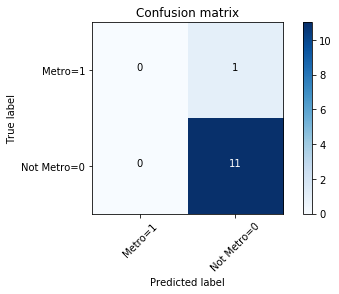

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Metro=1','Not Metro=0'],normalize= False,  title='Confusion matrix')

## Conclusion

The base expectation is that the neighborhood is not a Metro Station, with probability of -13%.  There are venues that increase the probability of a Metro Station, but none of them very much.  Even with over-fitting, the model does not predict Metro Stations, and it does not give false positives.

Thanks for reading this.